Test that convex approximation of the energy is always hypograph of the actual energy function

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import polyphase as phase
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pdb

In [12]:
f = phase.polynomial_energy
f = lambda x : phase.flory_huggins(x, [5,5,1],[1,0.5,0.5])

In [17]:
engine = phase.PHASE(f,200,3)
engine.compute(use_parallel=False, verbose=True, lift_label=False)

3-dimensional grid generated at 0.16s
Energy computed at 2.05s
Making energy manifold a paraboloid with 2x padding of 200000.00 maximum energy
Energy is corrected at 3.43s
Convexhull is computed at 3.49s
Using 6.28E-03 as a threshold for Laplacian of a simplex
Total of 16273 simplices in the convex hull
Simplices are labelled at 8.93s
Computation took 8.93s


<IPython.core.display.Javascript object>


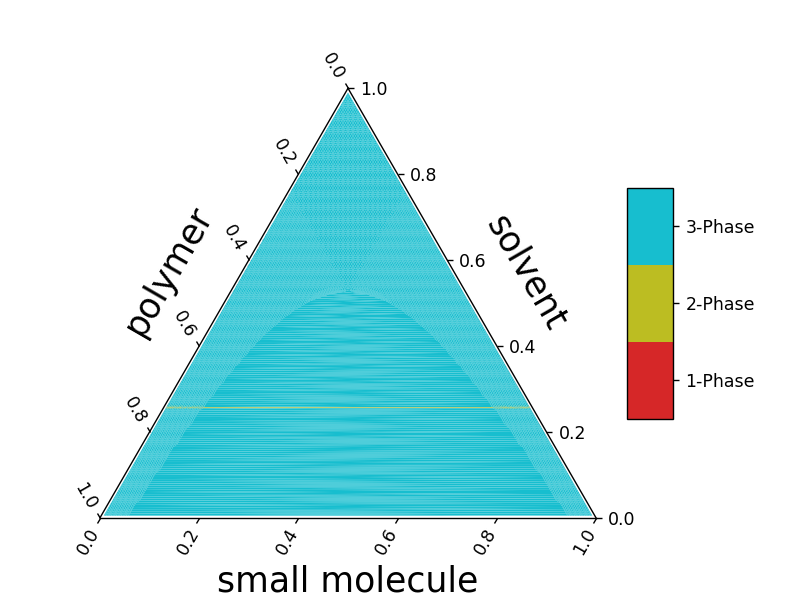

In [16]:
phase.plot_mpltern(engine.grid, engine.simplices, engine.num_comps)
plt.show()

In [15]:
for _ in range(10):
    test = phase.TestEpiGraph(engine.as_dict(),f,phase=1,**engine.get_kwargs())
    
    if test.is_epigraph():
        print('{} simplex PASSES test'.format(test.rnd_simplex))
    else:
        print('{} simplex FAILS test'.format(test.rnd_simplex))

ValueError: 'a' cannot be empty unless no samples are taken